In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
%matplotlib inline

In [84]:
url = "/content/data_2d.csv"
df = pd.read_csv(url)
df.head(5)

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


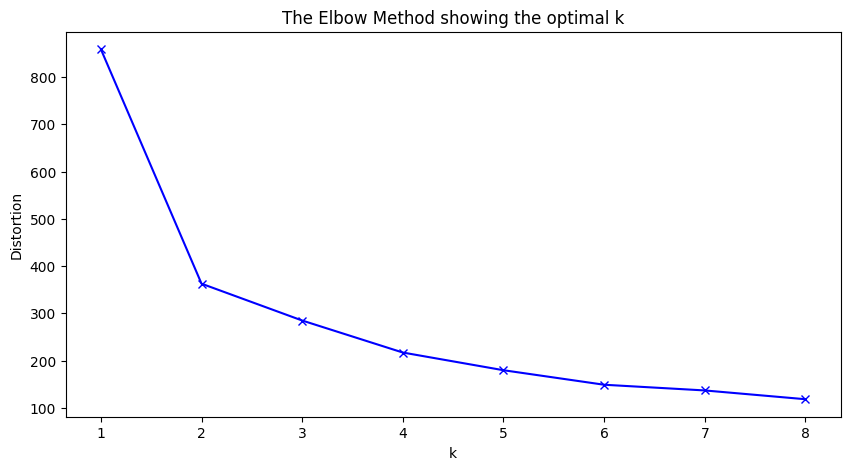

In [85]:
distortions = []
K = range(1,9)
for k in K:
  kmeanModel = KMeans(n_clusters=k, n_init="auto")
  kmeanModel.fit(df)
  distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

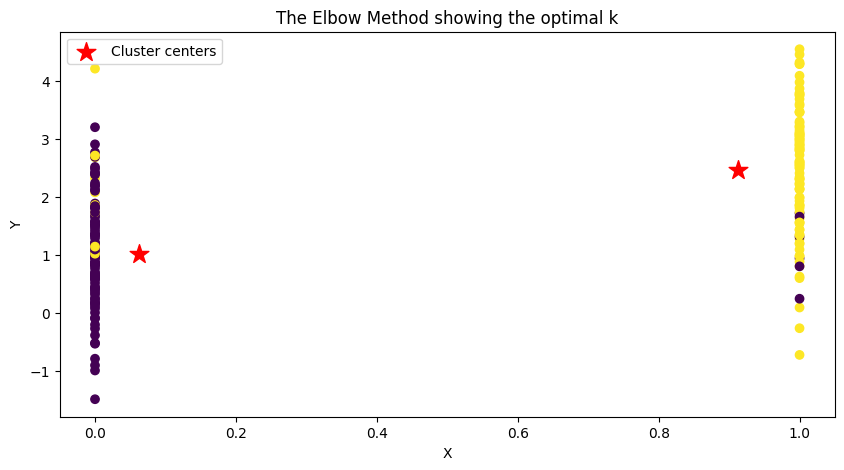

In [86]:
optimal_k = 2

kmeans = KMeans(n_clusters=optimal_k, n_init="auto")
kmeans.fit(df)

plt.figure(figsize=(10,5))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kmeans.labels_, cmap = 'viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', marker ="*", label= "Cluster centers")
plt.title("The Elbow Method showing the optimal k")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

mnist.csv без нормалізації даних

In [87]:
url = "/content/mnist.csv"
df = pd.read_csv(url)
df.head(5)

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data_index = df.index

pca = PCA(n_components=2)
data_pca = pca.fit_transform(df)

columns = ['PC1', 'PC2']
data_pca_df = pd.DataFrame(data_pca, columns=columns, index=data_index)

data_pca_df.head(6)

,PC1,PC2
0,-75.852883,-1043.514324
1,-969.412733,-344.762089
2,1054.118497,-358.677343
3,420.940710,671.096357
4,-1002.834669,-302.493075
5,-60.784081,423.318323


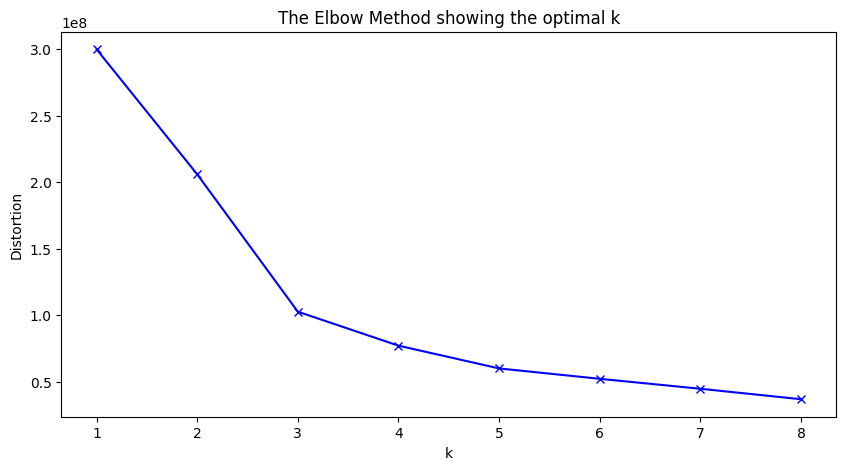

In [89]:
distortions = []
K = range(1,9)
for k in K:
  kmeanModel = KMeans(n_clusters=k, n_init="auto")
  kmeanModel.fit(data_pca_df)
  distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

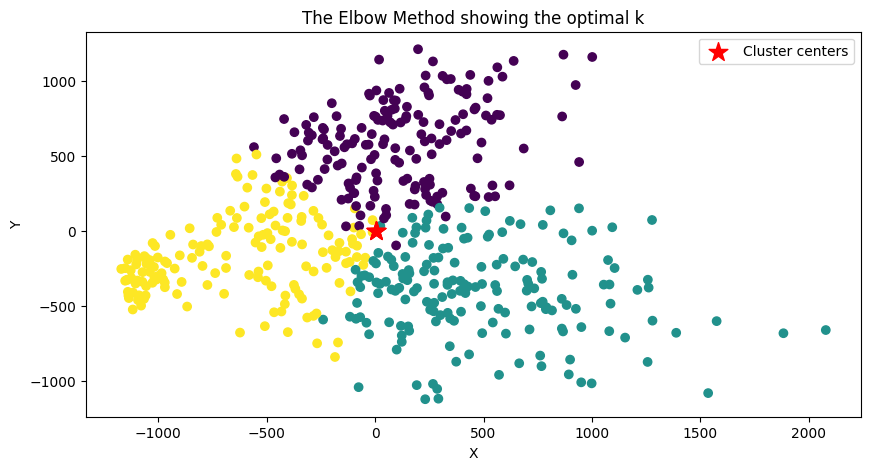

In [90]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, n_init="auto")
kmeans.fit(df)

plt.figure(figsize=(10,5))
plt.scatter(data_pca_df.iloc[:,0], data_pca_df.iloc[:,1], c=kmeans.labels_, cmap = 'viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', marker ="*", label= "Cluster centers")
plt.title("The Elbow Method showing the optimal k")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

З нормалізацією даних


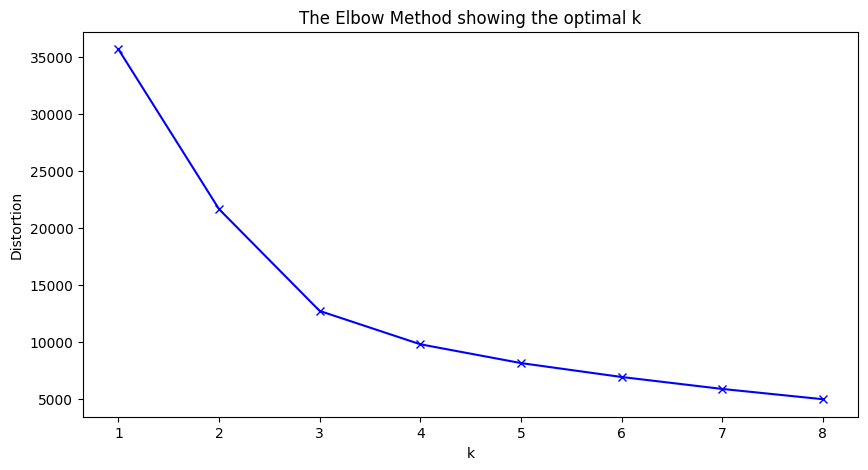

In [91]:
data_index = df.index

scaler = StandardScaler()
data_normalized = scaler.fit_transform(df)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

columns = ['PC1', 'PC2']
data_pca_df = pd.DataFrame(data_pca, columns=columns, index=data_index)

data_pca_df.head(6)

distortions = []
K = range(1,9)
for k in K:
  kmeanModel = KMeans(n_clusters=k, n_init="auto")
  kmeanModel.fit(data_pca_df)
  distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

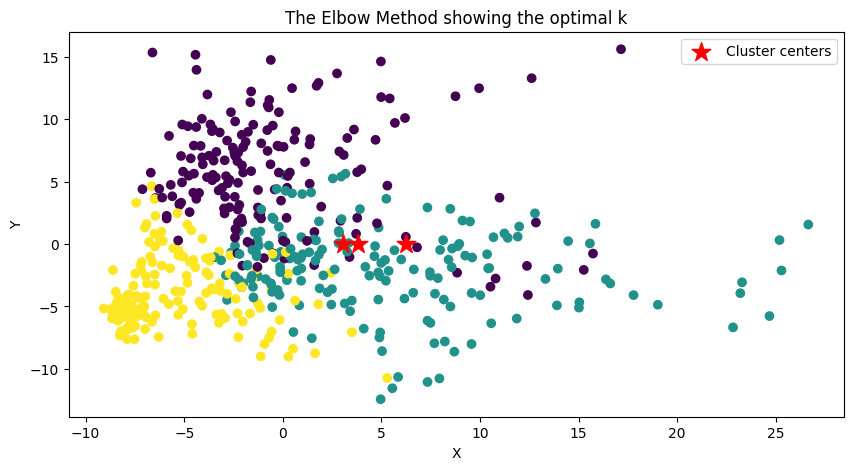

In [92]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, n_init="auto")
kmeans.fit(df)

plt.figure(figsize=(10,5))
plt.scatter(data_pca_df.iloc[:,0], data_pca_df.iloc[:,1], c=kmeans.labels_, cmap = 'viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', marker ="*", label= "Cluster centers")
plt.title("The Elbow Method showing the optimal k")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()